# Image Splitting

We will work on splitting an image into each part of the image.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import image

import itertools

tf.random.set_seed(1)

In [69]:
img  = Image.open('../Data/171.png').convert('L')

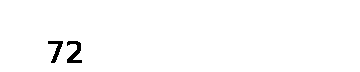

In [70]:
img

In [71]:
box = (45, 30, 85,65)
img = img.crop(box)

In [72]:
img = np.array(img)

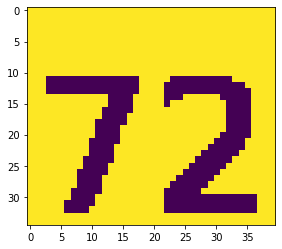

In [73]:
plt.imshow(img)

In [74]:
img = img/255
img = 1- img
img = img.astype('int')

### This finds where the image should be split. The average list it returns shows every column where that row thinks it should split.

In [130]:
def imagefinder(img):
    avglist = []
    first_object = 0
    second_object = 0
    for col in range(img.shape[1]-1):
        for row in range(img.shape[0]):
            if img[row][col] > 0:
                if img[row][col+1] == 0:
                    first_object = col
                if img[row][col-1] == 0:
                    second_object = col
        avg = (second_object-first_object)/2 + first_object
        if avg != 0:
            avglist.append(avg)
    return avglist

In [131]:
avglist = imagefinder(img)

In [77]:
avg = round(sum(avglist)/len(avglist))
avg

19

### This is where the image is actually split.

In [105]:
def splitter(avg, img):
    firstimg = np.zeros((35,avg))
    secondimg = np.zeros((35,img.shape[1]-avg))
    for i in range(0,35):
        firstimg[i] = img[i][:avg]
        secondimg[i] = img[i][avg:]
    return firstimg, secondimg

In [106]:
firstimg, secondimg = splitter(avg, img)

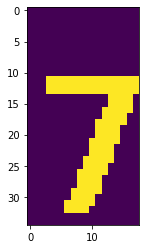

In [107]:
plt.imshow(firstimg)

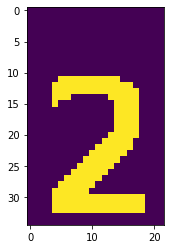

In [108]:
plt.imshow(secondimg)

## Try another Image

In [109]:
img2  = Image.open('../Data/132.png').convert('L')

In [110]:
box = (45, 30, 85,65)
img2 = img2.crop(box)

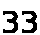

In [111]:
img2

In [112]:
img2 = np.array(img2)

In [113]:
img = img/255
img = 1- img
img = img.astype('int')

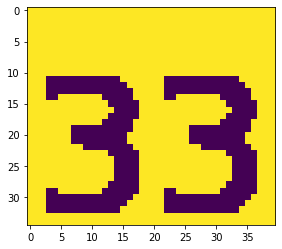

In [114]:
plt.imshow(img2)

In [115]:
avglist = imagefinder(img2)

In [121]:
avg = round(sum(avglist)/len(avglist))
avg

18

In [122]:
firstimg2, secondimg2 = splitter(avg, img2)

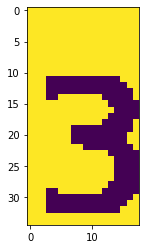

In [123]:
plt.imshow(firstimg2)

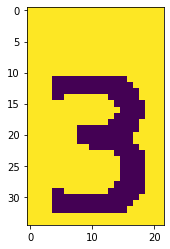

In [124]:
plt.imshow(secondimg2)

# Now let's try a fraction

In [2]:
frac  = Image.open('../Data/15.png').convert('L')

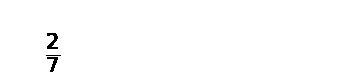

In [3]:
frac

In [4]:
box = (40, 30, 85,72)
frac = frac.crop(box)

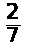

In [5]:
frac

In [6]:
frac = np.array(frac)

In [7]:
frac = frac/255
frac = 1- frac
frac = frac.astype('int')

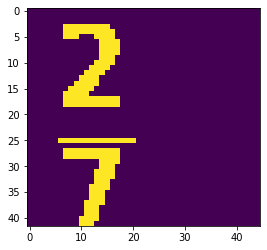

In [8]:
plt.imshow(frac)

In [9]:
frac[25]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [10]:
frac[27]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [24]:
tracking_list = []
object_here = 0
max_object_per_row = 0
for col in range(frac.shape[1]-1):
    for row in range(frac.shape[0]):
        if frac[row][col] > 0:
            object_here = object_here + 1
    if object_here >= max_object_per_row:
        max_object_per_row = object_here
    object_here = 0

In [46]:
def fracsplitter(max_object, img):
    firstimg = img[:max_object-1]
    fracline = img[max_object-3:max_object+3]
    secondimg = img[max_object+3:]
    return firstimg, secondimg, fracline

In [47]:
numeratorimg, denominatorimg, fracline = fracsplitter(max_object_per_row, frac)

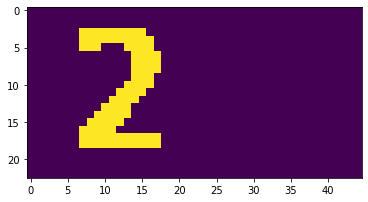

In [48]:
plt.imshow(numeratorimg)

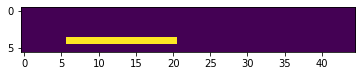

In [49]:
plt.imshow(fracline)

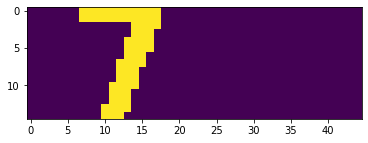

In [50]:
plt.imshow(denominatorimg)